In [7]:
#Numerical packages
import pandas as pd
import numpy as np
#---------------------------------------------
#Graphical packages
import matplotlib.image as mpimg
import matplotlib.pyplot
#---------------------------------------------
#Optimization packages
from scipy.optimize import minimize
from scipy.optimize import curve_fit

In [8]:
# Import data
data = pd.read_csv('~/Downloads/dataf.txt')
T_fig7 = data['T1']
Cp_fig7 = data['Fig7_data']
T_fig11 = data['T2']
Cp_fig11 = data['Fig11_data']
# Constant values
R = 8.314/1000 #kJ/molK

In [9]:
data.head()

,T1,Fig7_data,T2,Fig11_data
0,303.58,0.09,280.50,-0.06
1,304.55,0.56,282.25,-0.14
2,305.56,1.05,284.08,-0.14
3,306.52,1.48,285.81,-0.16
4,307.52,1.96,287.64,-0.16


In [10]:
def Cp_xs_fit(x):
    a=x[0]
    b=x[1]
    c=x[2]
    d=x[3]
    delta_H_cal_ref=x[4]
    delta_H_vH_ref=x[5]
    T_ref=x[6]
    Cp_N=a+b*T_fig7
    delta_Cp=((b-d)*T_fig7)+(c-a)
    K_T = ((delta_H_vH_ref/R)*((1/T_ref)-(1/T_fig7))+((d-b)/(2*R))*(T_fig7-T_ref+(T_ref**2)*((1/T_fig7)-(1/T_ref)))+((c-a)/R)*(np.log(T_fig7/T_ref)+(T_ref/T_fig7)-1))
    f_D=K_T/(1+K_T)
    delta_H_vH=delta_H_vH_ref+(c-a)*(T_fig7-T_ref)+(-(b-d)/2)*(T_fig7**2-T_ref**2)
    delta_H_cal=delta_H_cal_ref+(c-a)*(T_fig7-T_ref)+(-(b-d)/2)*(T_fig7**2-T_ref**2)
    return ((Cp_fig7-((delta_H_cal*delta_H_vH)/(R*(T_fig7**2)))*(1/((1/f_D)+(1/(1-f_D))))+(delta_H_cal_ref/delta_H_vH_ref)*(f_D*delta_Cp+Cp_N))**2).sum()/len(T_fig7)

In [11]:
def Cp_xs(x):
    a=x[0]
    b=x[1]
    c=x[2]
    d=x[3]
    delta_H_cal_ref=x[4]
    delta_H_vH_ref=x[5]
    T_ref=x[6]
    Cp_N=a+b*T_fig7
    delta_Cp=((b-d)*T_fig7)+(c-a)
    K_T = ((delta_H_vH_ref/R)*((1/T_ref)-(1/T_fig7))+((d-b)/(2*R))*(T_fig7-T_ref+(T_ref**2)*((1/T_fig7)-(1/T_ref)))+((c-a)/R)*(np.log(T_fig7/T_ref)+(T_ref/T_fig7)-1))
    f_D=K_T/(1+K_T)
    delta_H_vH=delta_H_vH_ref+(c-a)*(T_fig7-T_ref)+((d-b)/2)*(T_fig7**2-T_ref**2)
    delta_H_cal=delta_H_cal_ref+(c-a)*(T_fig7-T_ref)+((d-b)/2)*(T_fig7**2-T_ref**2)
    return -((delta_H_cal*delta_H_vH)/(R*(T_fig7**2)))*(1/((1/f_D)+(1/(1-f_D))))+(delta_H_cal_ref/delta_H_vH_ref)*(f_D*delta_Cp+Cp_N)

In [22]:
#Minization of MSE algorithm
x = [-188.3, 0.62, 46.3, -0.08, 365, 418, 332.4] #Inital guess
x_opt = minimize(Cp_xs_fit, x) #Minimization command
x_opt #Show results of minization

      fun: 59.75061707397708
 hess_inv: array([[ 1.54763832e+01, -4.41588598e-02,  3.55527978e+00,
        -7.08024249e-02, -2.52144819e-01, -8.02213512e-03,
        -1.25091492e-01],
       [-4.41588598e-02,  1.26003055e-04, -1.01429349e-02,
         2.02031605e-04,  7.19497748e-04,  2.28912240e-05,
         3.56945134e-04],
       [ 3.55527978e+00, -1.01429349e-02,  8.74167584e-01,
        -1.61149602e-02, -5.67499851e-02, -1.80555720e-03,
        -2.80933892e-02],
       [-7.08024249e-02,  2.02031605e-04, -1.61149602e-02,
         3.24316509e-04,  1.15661692e-03,  3.67983361e-05,
         5.73968144e-04],
       [-2.52144819e-01,  7.19497748e-04, -5.67499851e-02,
         1.15661692e-03,  4.13394442e-03,  1.31523236e-04,
         2.05115568e-03],
       [-8.02213512e-03,  2.28912240e-05, -1.80555720e-03,
         3.67983361e-05,  1.31523236e-04,  4.18446975e-06,
         6.52583995e-05],
       [-1.25091492e-01,  3.56945134e-04, -2.80933892e-02,
         5.73968144e-04,  2.05115568e

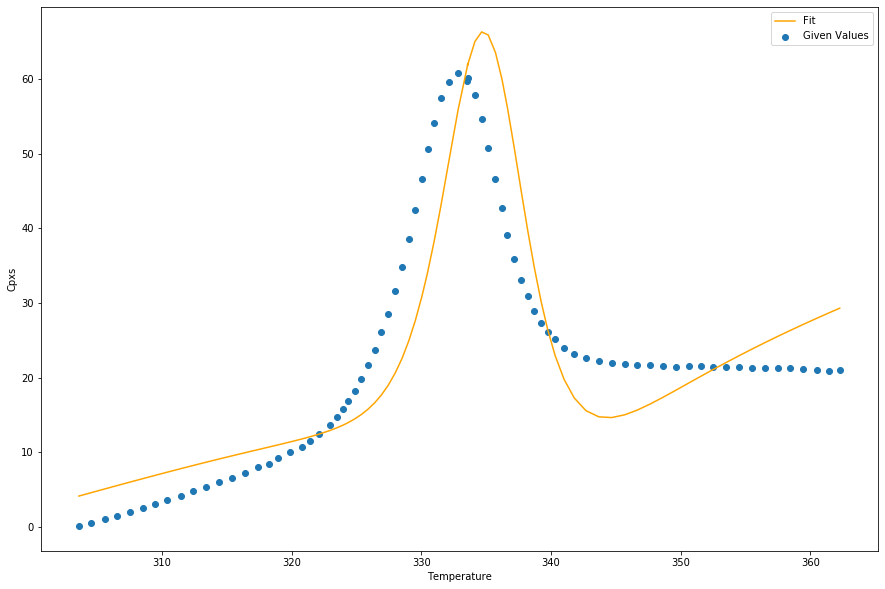

In [23]:
#Plot 7
plt.figure(figsize=(15,10))
plt.scatter(T_fig7, Cp_fig7, label = 'Given Values')
plt.plot(T_fig7, -Cp_xs(x_opt.x), color='orange', label = 'Fit')
plt.xlabel('Temperature')
plt.ylabel('Cpxs')
plt.legend()
plt.show()

In [14]:
def Cp_xs_fit_fig11(x):
    a=x[0]
    b=x[1]
    c=x[2]
    d=x[3]
    delta_H_cal_ref=x[4]
    delta_H_vH_ref=x[5]
    T_ref=x[6]
    Cp_N=a+b*T_fig11
    delta_Cp=((b-d)*T_fig11)+(c-a)
    K_T = ((delta_H_vH_ref/R)*((1/T_ref)-(1/T_fig11))+((d-b)/(2*R))*(T_fig11-T_ref+(T_ref**2)*((1/T_fig11)-(1/T_ref)))+((c-a)/R)*(np.log(T_fig11/T_ref)+(T_ref/T_fig11)-1))
    f_D=K_T/(1+K_T)
    delta_H_vH=delta_H_vH_ref+(c-a)*(T_fig11-T_ref)+(-(b-d)/2)*(T_fig11**2-T_ref**2)
    delta_H_cal=delta_H_cal_ref+(c-a)*(T_fig11-T_ref)+(-(b-d)/2)*(T_fig11**2-T_ref**2)
    return ((Cp_fig11-((delta_H_cal*delta_H_vH)/(R*(T_fig11**2)))*(1/((1/f_D)+(1/(1-f_D))))+(delta_H_cal_ref/delta_H_vH_ref)*(f_D*delta_Cp+Cp_N))**2).sum()/len(T_fig11)

In [15]:
def Cp_xs_fig11(x):
    a=x[0]
    b=x[1]
    c=x[2]
    d=x[3]
    delta_H_cal_ref=x[4]
    delta_H_vH_ref=x[5]
    T_ref=x[6]
    Cp_N=a+b*T_fig11
    delta_Cp=((b-d)*T_fig11)+(c-a)
    K_T = ((delta_H_vH_ref/R)*((1/T_ref)-(1/T_fig11))+((d-b)/(2*R))*(T_fig11-T_ref+(T_ref**2)*((1/T_fig11)-(1/T_ref)))+((c-a)/R)*(np.log(T_fig11/T_ref)+(T_ref/T_fig11)-1))
    f_D=K_T/(1+K_T)
    delta_H_vH=delta_H_vH_ref+(c-a)*(T_fig11-T_ref)+(-(b-d)/2)*(T_fig11**2-T_ref**2)
    delta_H_cal=delta_H_cal_ref+(c-a)*(T_fig11-T_ref)+(-(b-d)/2)*(T_fig11**2-T_ref**2)
    return ((delta_H_cal*delta_H_vH)/(R*(T_fig11**2)))*(1/((1/f_D)+(1/(1-f_D))))+(delta_H_cal_ref/delta_H_vH_ref)*(f_D*delta_Cp+Cp_N)

In [16]:
#Minization of MSE algorithm
x = [-150, 0.60, 40, 0, 350, 400, 330] #Inital guess
x_opt_fig11 = minimize(Cp_xs_fit_fig11, x) #Minimization command
x_opt_fig11 #Show results of minization

      fun: 0.04081680396031436
 hess_inv: array([[ 4.63333882e+04, -1.72625935e+02,  5.62651593e+04,
        -2.03444638e+02, -1.62725472e+04,  2.26726278e+02,
        -3.05727852e-01],
       [-1.72625935e+02,  6.43257392e-01, -2.09656439e+02,
         7.58167850e-01,  6.06948262e+01, -8.12088023e-01,
         9.70211202e-04],
       [ 5.62651593e+04, -2.09656439e+02,  6.83364501e+04,
        -2.47107866e+02, -1.97699897e+04,  2.76139895e+02,
        -3.63323182e-01],
       [-2.03444638e+02,  7.58167850e-01, -2.47107866e+02,
         8.93661503e-01,  7.15788774e+01, -9.37386927e-01,
         1.03939445e-03],
       [-1.62725472e+04,  6.06948262e+01, -1.97699897e+04,
         7.15788774e+01,  5.81223561e+03, -9.92318729e+00,
        -2.05606962e-01],
       [ 2.26726279e+02, -8.12088023e-01,  2.76139895e+02,
        -9.37386927e-01, -9.92318735e+00,  6.56677949e+01,
        -2.91884010e-01],
       [-3.05727852e-01,  9.70211204e-04, -3.63323182e-01,
         1.03939445e-03, -2.0560696

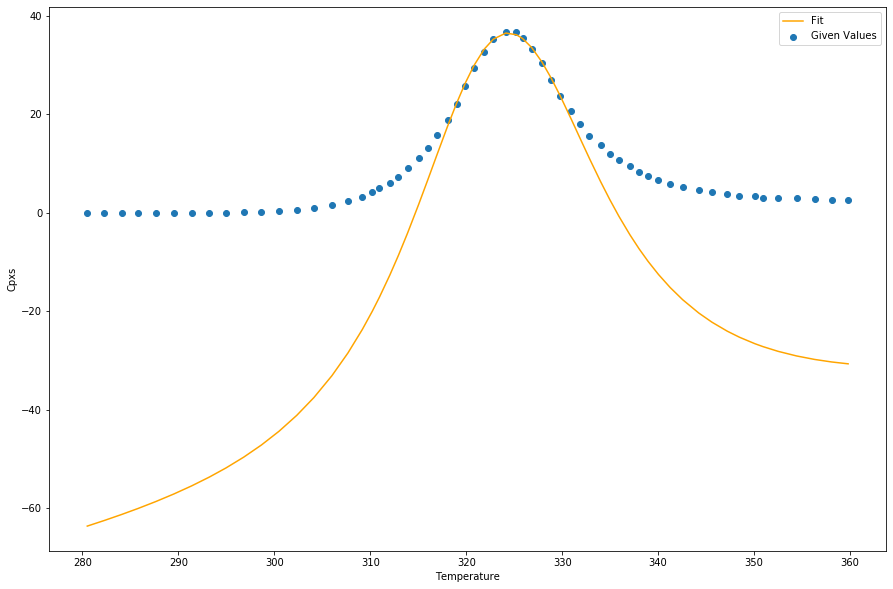

In [21]:
#Plot 11
plt.figure(figsize=(15,10))
plt.scatter(T_fig11, Cp_fig11, label = 'Given Values')
plt.plot(T_fig11, -Cp_xs_fig11(x_opt_fig11.x), color='orange', label = 'Fit')
plt.xlabel('Temperature')
plt.ylabel('Cpxs')
plt.legend()
plt.show()